<class 'str'>


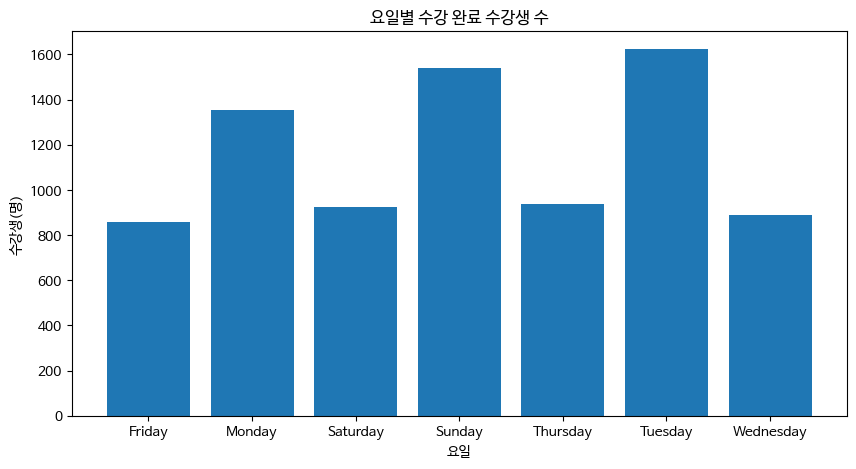

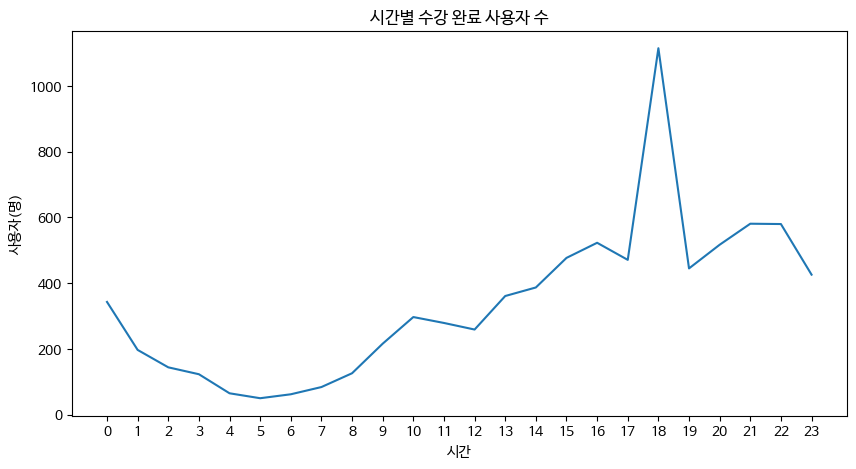

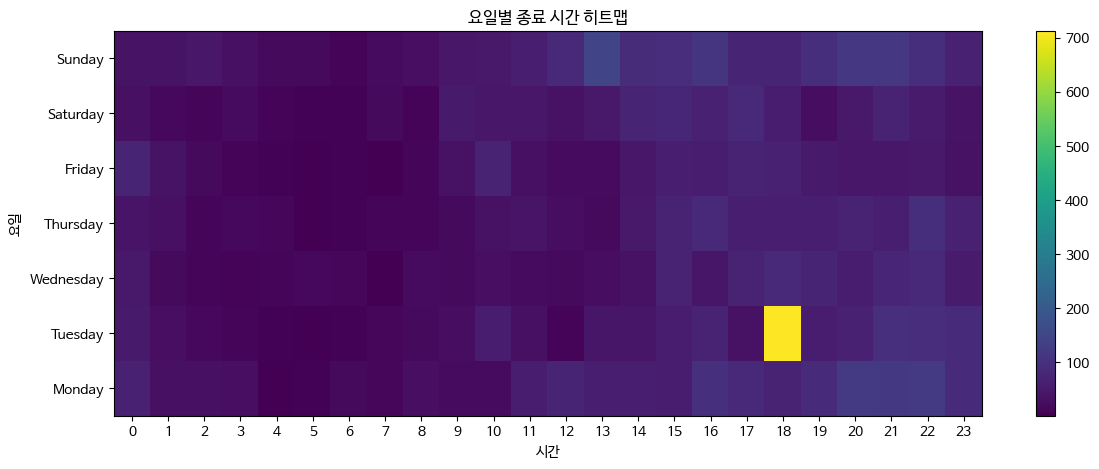

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sparta_data = pd.read_table('/content/access_detail.csv', sep=',')
#데이터 전처리 - 날짜 데이터 다루기
print(type(sparta_data["access_date"][0]))
format='%Y-%m-%dT%H:%M:%S.%f'
sparta_data['access_date_time'] = pd.to_datetime(sparta_data['access_date'], format=format)
sparta_data['access_date_time_weekday'] = sparta_data['access_date_time'].dt.day_name()
sparta_data['access_date_time_hour'] = sparta_data['access_date_time'].dt.hour

weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = sparta_data.groupby('access_date_time_weekday')['user_id'].count()
weekdata

hourdata = sparta_data.groupby('access_date_time_hour')['user_id'].count()
hourdata = hourdata.sort_index()
hourdata

#그래프 사이즈
plt.figure(figsize=(10,5))
plt.rc('font', family='NanumBarunGothic')

#그래프 x축 y축
plt.bar(weekdata.index, weekdata)

#그래프 명
plt.title('요일별 수강 완료 수강생 수')

#그래프 x축 레이블
plt.xlabel('요일')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을 90도로 변환
plt.xticks(rotation=0)

#그래프 출력
plt.show()

#그래프 사이즈 변경
plt.figure(figsize=(10,5))
plt.rc('font', family='NanumBarunGothic')

#그래프 x축 y축
plt.plot(hourdata.index, hourdata)

#그래프 명
plt.title('시간별 수강 완료 사용자 수')

#그래프 x축 레이블
plt.xlabel('시간')

#그래프 y축 레이블
plt.ylabel('사용자(명)')

#x축 눈금 표시 하기
plt.xticks(np.arange(24))

#그래프 출력
plt.show()


#피벗 테이블 만들기
sparta_data_pivot_table = pd.pivot_table(sparta_data, values='user_id',
                       index=['access_date_time_weekday'],
                       columns=['access_date_time_hour'],
                       aggfunc="count").agg(weeks)
sparta_data_pivot_table

#그래프 사이즈 변경
plt.figure(figsize=(14,5))

#pcolor를 이용하여 heatmap 그리기
plt.pcolor(sparta_data_pivot_table)

#히트맵에서의 x축
plt.xticks(np.arange(0.5, len(sparta_data_pivot_table.columns), 1), sparta_data_pivot_table.columns)

#히트맵에서의 y축
plt.yticks(np.arange(0.5, len(sparta_data_pivot_table.index), 1), sparta_data_pivot_table.index)

#그래프 명
plt.title('요일별 종료 시간 히트맵')

#그래프 x축 레이블
plt.xlabel('시간')

#그래프 y축 레이블
plt.ylabel('요일')

#plt.colorbar() 명령어를 추가하면 그래프 옆에 숫자별 색상값을 나타내는 컬러바를 보여 줍니다
plt.colorbar()
plt.show()

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direct

#Finding out datatype
type(sparta_data["access_date"][0])

#날짜 포맷팅
format='%Y-%m-%dT%H:%M:%S.%f'
sparta_data['access_date_time'] = pd.to_datetime(sparta_data['access_date'], format=format)

#New column 생성 및 요일 데이터만 뽑아서 넣기
sparta_data['access_date_time_weekday'] = sparta_data['access_date_time'].dt.day_name()

#groupby 사용
**그룹을 짓고 그 그룹의 갯수를 아래와 같이 세게 시킬 수 있음**
<aside>
groupby(’컬럼명’)`를 사용하면데이터를 특정 기준으로 그룹화하여 처리가 가능
이후, `count()`을 이용하여 해당 데이터의 개수를 세고

마지막으로, `agg(”변수”)`를 이용하면

**변수 안 데이터 별 합계**를 구할 수 있습니다.

</aside>

weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = sparta_data.groupby('access_date_time_weekday')['user_id'].count()
weekdata

#Sort 함수 써서 오름차순
hourdata = hourdata.sort_index()

(내림차순 사용 원할 시 .sort_index(ascending=False))


---------------------------------------
#데이터 시각화
피벗테이블 만들기
values : 열에 들어 가는 부분
index : 행에 들어가는 부분
aggfunc : 데이터 축약시 사용할 함수